# Analyze results of `bechmark_silicon.py`

In [2]:
import pandas as pd
# Load the results from the JSON file
report = pd.read_json('report.json')

In [3]:
# Count how many empty lists are in `algorithms` column
report['algorithms'].apply(lambda x: len(x)).value_counts()
# report[['algorithms', 'identifier']]
# Show the rows where `algorithms` is empty
pd.set_option('display.max_colwidth', None)
report[report['algorithms'].apply(lambda x: len(x) == 0)][['algorithms', 'identifier', 'file_path']]

,algorithms,identifier,file_path
6,[],1119,../viperserver/silicon/silver/src/test/resources/transformations/Macros/Hygienic/nestedRef.vpr
8,[],1130,../viperserver/silicon/silver/src/test/resources/transformations/Macros/Expansion/simple2Ref.vpr
9,[],731,../viperserver/silicon/silver/src/test/resources/all/issues/silicon/0203.vpr
11,[],1141,../viperserver/silicon/silver/src/test/resources/transformations/FoldConstants/simple.vpr
12,[],1249,../viperserver/silicon/silver/src/test/resources/termination/methods/loops/loopCondition.vpr
...,...,...,...
1067,[],769,../viperserver/silicon/silver/src/test/resources/all/issues/silicon/0328b.vpr
1068,[],808,../viperserver/silicon/silver/src/test/resources/all/issues/silicon/0045.vpr
1069,[],678,../viperserver/silicon/silver/src/test/resources/all/issues/silver/0168_lib.vpr
1073,[],491,../viperserver/silicon/silver/src/test/resources/all/sets/sets.vpr


In [4]:
# Iterate over algorithms and event kinds
all_event_kinds = set()
decide_and_or_per_algorithm = []
for row in report.itertuples():
    algorithms_used = set()
    for (resource, algorithm) in row.algorithms:
        algorithms_used.add(algorithm)
    for event_kinds in row.event_kinds:
        event_kinds = dict(event_kinds)
        all_event_kinds.update(event_kinds.keys())
    decide_and_or_per_algorithm.append((str(list(sorted(algorithms_used))), event_kinds.get('DecideAndOr', 0)))
# decide_and_or_per_algorithm as DataFrame
decide_and_or_per_algorithm = pd.DataFrame(decide_and_or_per_algorithm, columns=['algorithms', 'DecideAndOr'])

(0.0, 200.0)

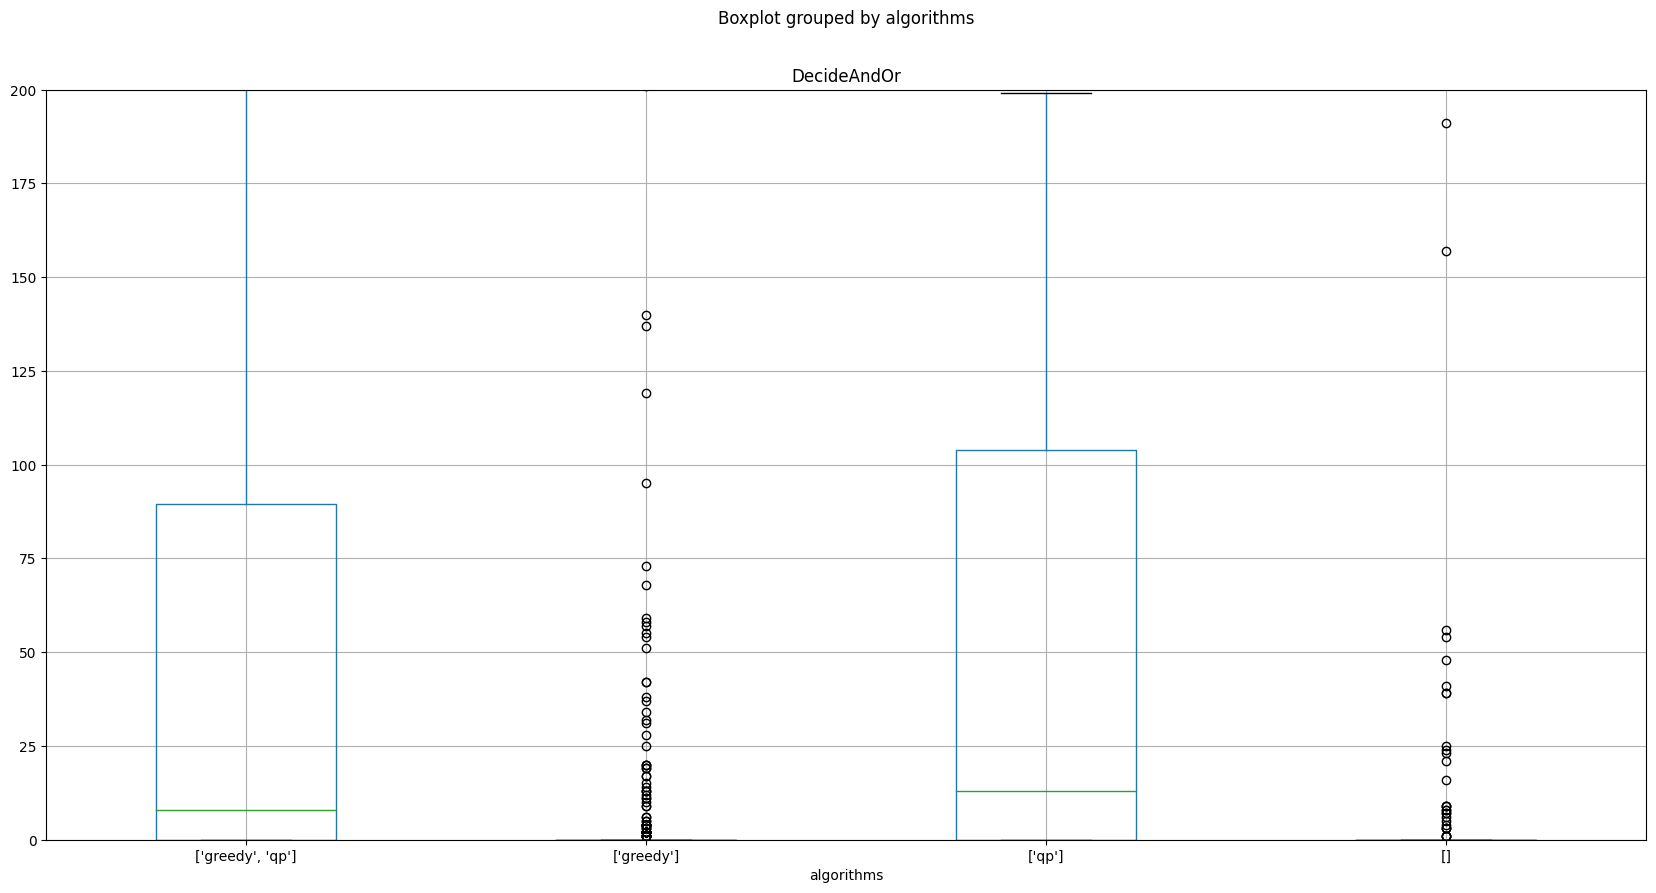

In [9]:
# Show a box plot of the number of DecideAndOr events per algorithm
ax = decide_and_or_per_algorithm.boxplot(by='algorithms', column='DecideAndOr', figsize=(20, 10))
ax.set_ylim(0, 200)

In [10]:
# Compute the median number of DecideAndOr events per algorithm
decide_and_or_per_algorithm.groupby('algorithms').median().sort_values(by='DecideAndOr', ascending=False)

,DecideAndOr
algorithms,
['qp'],13.0
"['greedy', 'qp']",8.0
['greedy'],0.0
[],0.0
